{0: array([0., 0.]), 1: array([0.2, 0.2]), 2: array([0.4, 0.4]), 3: array([0.6, 0.6]), 4: array([0.8, 0.8])}
Step 1, Error: 1713.812727, Learning Rate: 0.100000
Step 2, Error: 1613.942084, Learning Rate: 0.100000
Step 3, Error: 1438.345746, Learning Rate: 0.100000
Step 4, Error: 1285.528135, Learning Rate: 0.100000
Step 5, Error: 1177.852130, Learning Rate: 0.100000
Step 6, Error: 1067.944547, Learning Rate: 0.100000
Step 7, Error: 933.989010, Learning Rate: 0.100000
Step 8, Error: 771.223343, Learning Rate: 0.100000
Step 9, Error: 729.800345, Learning Rate: 0.100000
Step 10, Error: 644.975450, Learning Rate: 0.100000
Step 11, Error: 637.336578, Learning Rate: 0.100000
Step 12, Error: 642.536726, Learning Rate: 0.100000
Step 13, Error: 621.895210, Learning Rate: 0.090000
Step 14, Error: 628.551156, Learning Rate: 0.090000
Step 15, Error: 588.716758, Learning Rate: 0.081000
Step 16, Error: 590.328938, Learning Rate: 0.081000
Step 17, Error: 585.923983, Learning Rate: 0.072900
Step 18, E

Step 160, Error: 2.457774, Learning Rate: 0.000131
Step 161, Error: 2.457480, Learning Rate: 0.000118
Step 162, Error: 2.452566, Learning Rate: 0.000118
Step 163, Error: 2.451816, Learning Rate: 0.000118
Step 164, Error: 2.453472, Learning Rate: 0.000118
Step 165, Error: 2.455120, Learning Rate: 0.000106
Step 166, Error: 2.452800, Learning Rate: 0.000096
Step 167, Error: 2.452306, Learning Rate: 0.000096
Step 168, Error: 2.445513, Learning Rate: 0.000096
Step 169, Error: 2.444852, Learning Rate: 0.000096
Step 170, Error: 2.444331, Learning Rate: 0.000096
Step 171, Error: 2.442855, Learning Rate: 0.000096
Step 172, Error: 2.441687, Learning Rate: 0.000096
Step 173, Error: 2.441937, Learning Rate: 0.000096
Step 174, Error: 2.441795, Learning Rate: 0.000086
Step 175, Error: 2.442044, Learning Rate: 0.000086
Step 176, Error: 2.442027, Learning Rate: 0.000077
Step 177, Error: 2.442127, Learning Rate: 0.000077
Step 178, Error: 2.442057, Learning Rate: 0.000070
Step 179, Error: 2.440626, Lear

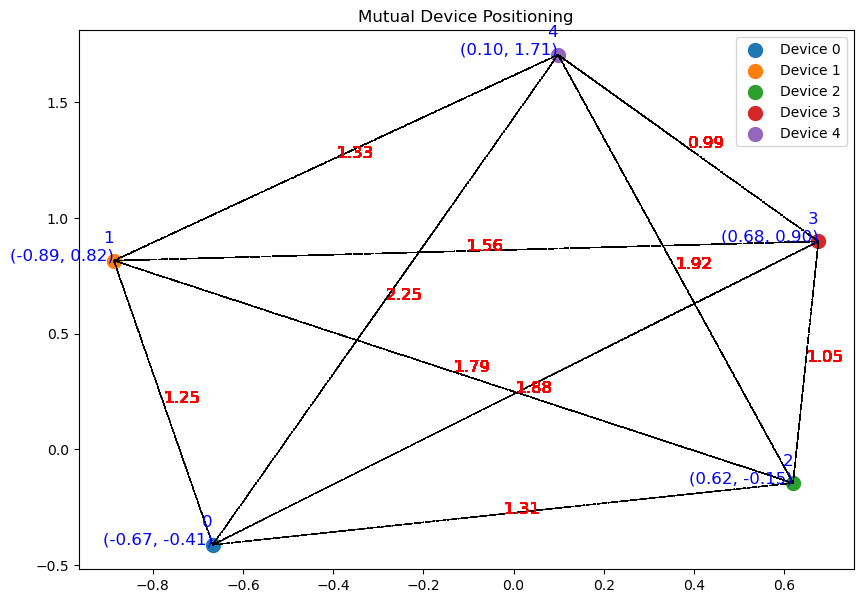

IndexError: index 2 is out of bounds for axis 0 with size 2

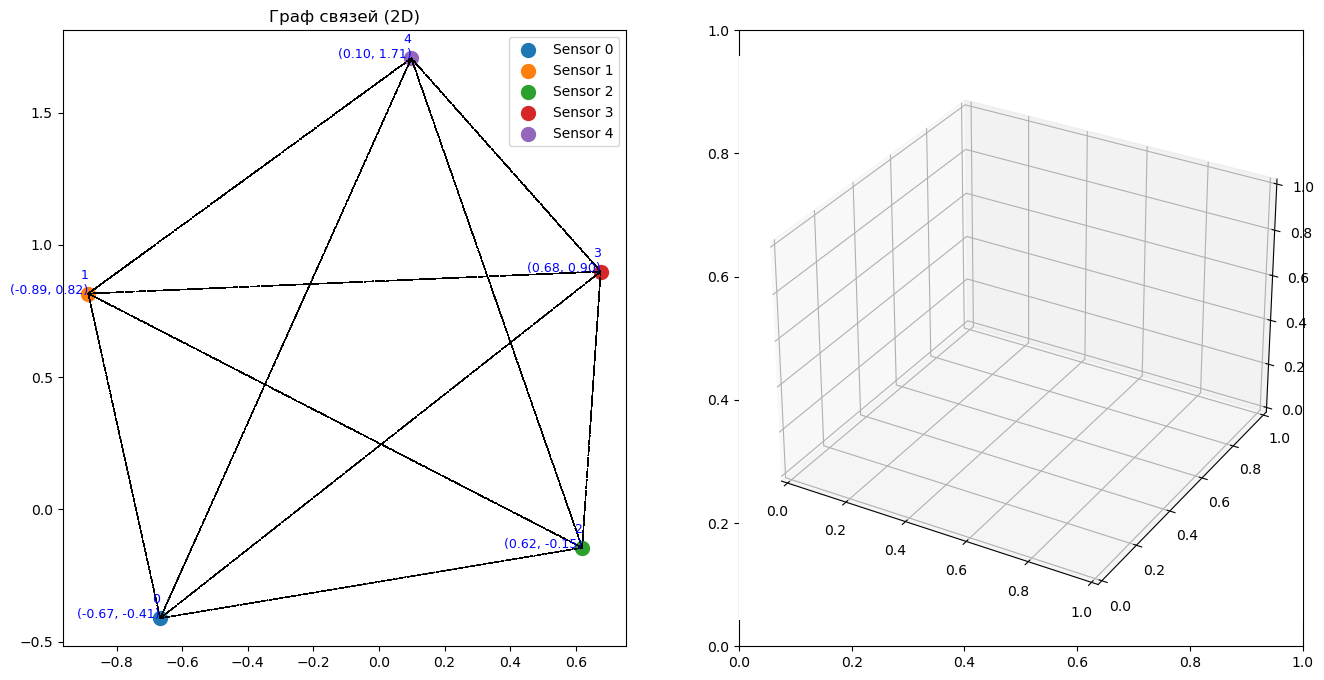

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class Parameters:
    def __init__(self):
        self.n = 0
        self.N = []
        self.distances = []

def load_data(file_path):
    distances = []
    with open(file_path, 'r') as f:
        for line in f:
            sensor_1, sensor_2, distance = map(float, line.strip().split())
            distances.append((int(sensor_1), int(sensor_2), distance))
    return distances

class SPSA:
    def __init__(self, n, N, distances, dimensions=3):
        self.n = n
        self.N = N
        self.distances = distances
        self.dimensions = dimensions

    def distance_error(self, coord):
        total_error = 0
        for sensor_1, sensor_2, expected_dist in self.distances:
            current_dist = np.linalg.norm(coord[sensor_1] - coord[sensor_2])
            total_error += (current_dist - expected_dist) ** 2
        return total_error

    def run(self, num_steps=100, learning_rate=0.001, perturbation_scale=0.1):
        coord = {i: np.ones(self.dimensions) * (i / len(self.N)) for i in self.N}  # Инициализация в меньшем диапазоне
        print(coord)
        errors = []

        p = 0
        #for step in range(num_steps):
        step = 0
        while (True):
            delta = {i: np.random.choice([-1, 1], size=self.dimensions) * perturbation_scale for i in self.N}

            coord_plus = {i: coord[i] + delta[i] for i in self.N}
            coord_minus = {i: coord[i] - delta[i] for i in self.N}

            error_plus = self.distance_error(coord_plus)
            error_minus = self.distance_error(coord_minus)

            grad = {i: (error_plus - error_minus) / (2 * perturbation_scale) for i in self.N}

            for i in self.N:
                coord[i] -= np.clip(learning_rate * grad[i] * delta[i], -0.1, 0.1)

            error = self.distance_error(coord)
            errors.append(error)

            print(f"Step {step + 1}, Error: {error:.6f}, Learning Rate: {learning_rate:.6f}")

            if learning_rate < 0.000001:
                print("Error threshold reached.")
                break

            #if step > 0 and errors[-1] > errors[-2]:
             #   print("Error is increasing. Stopping early.")
              #  break

            if step > 0 and error > p:#errors[-1] == errors[-2]:
                learning_rate *= 0.9
            p = error
            
            step += 1

        self.errors = errors
        self.final_coords = coord
        return coord
    
def calculate_real_distances(coords):
    real_distances = []
    for sensor_1 in coords:
        for sensor_2 in coords:
            if sensor_1 < sensor_2:
                distance = np.linalg.norm(coords[sensor_1] - coords[sensor_2])
                real_distances.append((sensor_1, sensor_2, distance))
    return real_distances

def plot_sensor_graph_with_coords_2d(distances, coords):
    fig, ax = plt.subplots(figsize=(10, 7))

    for sensor_1, sensor_2, distance in distances:
        x_values = [coords[sensor_1][0], coords[sensor_2][0]]
        y_values = [coords[sensor_1][1], coords[sensor_2][1]]
        ax.plot(x_values, y_values, 'k--', lw=0.5)
        mid_x = (x_values[0] + x_values[1]) / 2
        mid_y = (y_values[0] + y_values[1]) / 2
#        ax.text(mid_x, mid_y, f"{distance:.2f}", fontsize=9, color='red')
        d = np.linalg.norm(coords[sensor_1] - coords[sensor_2])
        ax.text(mid_x, mid_y, f"{d:.2f}", fontsize=12, color='red')

    for sensor, coord in coords.items():
        ax.scatter(coord[0], coord[1], label=f"Device {sensor}", s=100)
        ax.text(coord[0], coord[1], f"{sensor}\n({coord[0]:.2f}, {coord[1]:.2f})", 
                fontsize=12, ha='right', color='blue')

    ax.set_title("Mutual Device Positioning")
    ax.legend()
    plt.show()

def plot_sensor_graph_with_coords_3d(distances, coords):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    for sensor_1, sensor_2, distance in distances:
        x_values = [coords[sensor_1][0], coords[sensor_2][0]]
        y_values = [coords[sensor_1][1], coords[sensor_2][1]]
        z_values = [coords[sensor_1][2], coords[sensor_2][2]]
        ax.plot(x_values, y_values, z_values, 'k--', lw=0.5)
        mid_x = (x_values[0] + x_values[1]) / 2
        mid_y = (y_values[0] + y_values[1]) / 2
        mid_z = (z_values[0] + z_values[1]) / 2
#        ax.text(mid_x, mid_y, mid_z, f"{distance:.2f}", fontsize=8, color='red')

    for sensor, coord in coords.items():
        ax.scatter(coord[0], coord[1], coord[2], label=f"Sensor {sensor}", s=100)
        ax.text(coord[0], coord[1], coord[2], f"{sensor}\n({coord[0]:.2f}, {coord[1]:.2f}, {coord[2]:.2f})", 
                fontsize=9, ha='right', color='blue')

    ax.set_title("Граф связей между сенсорами (3D)")
    ax.legend()
    plt.show()

def plot_combined_graph(distances, coords):
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    ax = axes[0]
    for sensor_1, sensor_2, distance in distances:
        x_values = [coords[sensor_1][0], coords[sensor_2][0]]
        y_values = [coords[sensor_1][1], coords[sensor_2][1]]
        ax.plot(x_values, y_values, 'k--', lw=0.5)
        mid_x = (x_values[0] + x_values[1]) / 2
        mid_y = (y_values[0] + y_values[1]) / 2
#        ax.text(mid_x, mid_y, f"{distance:.2f}", fontsize=8, color='red')

    for sensor, coord in coords.items():
        ax.scatter(coord[0], coord[1], label=f"Sensor {sensor}", s=100)
        ax.text(coord[0], coord[1], f"{sensor}\n({coord[0]:.2f}, {coord[1]:.2f})", 
                fontsize=9, ha='right', color='blue')

    ax.set_title("Граф связей (2D)")
    ax.legend()

    ax = fig.add_subplot(122, projection='3d')
    for sensor_1, sensor_2, distance in distances:
        x_values = [coords[sensor_1][0], coords[sensor_2][0]]
        y_values = [coords[sensor_1][1], coords[sensor_2][1]]
        z_values = [coords[sensor_1][2], coords[sensor_2][2]]
        ax.plot(x_values, y_values, z_values, 'k--', lw=0.5)
        mid_x = (x_values[0] + x_values[1]) / 2
        mid_y = (y_values[0] + y_values[1]) / 2
        mid_z = (z_values[0] + z_values[1]) / 2
#        ax.text(mid_x, mid_y, mid_z, f"{distance:.2f}", fontsize=8, color='red')

    for sensor, coord in coords.items():
        ax.scatter(coord[0], coord[1], coord[2], label=f"Sensor {sensor}", s=100)
        ax.text(coord[0], coord[1], coord[2], f"{sensor}\n({coord[0]:.2f}, {coord[1]:.2f}, {coord[2]:.2f})", 
                fontsize=9, ha='right', color='blue')

    ax.set_title("Граф связей (3D)")
    ax.legend()

    plt.suptitle("Комбинированный граф (2D и 3D)")
    plt.show()

if __name__ == "__main__":
    par = Parameters()

    par.distances = load_data("data_1.txt")  # Загрузка данных о расстояниях
    par.n = max(max(sensor_1, sensor_2) for sensor_1, sensor_2, _ in par.distances) + 1  # Определение количества сенсоров
    par.N = list(range(par.n))

    # Проверка, что все сенсоры присутствуют в списке
    for sensor_1, sensor_2, _ in par.distances:
        if sensor_1 not in par.N or sensor_2 not in par.N:
            raise ValueError(f"Сенсоры {sensor_1} или {sensor_2} отсутствуют в списке {par.N}")

    spsa = SPSA(par.n, par.N, par.distances, dimensions=2)
    coords = spsa.run(num_steps=100, learning_rate=0.1)

    print("\nФинальные координаты сенсоров:")
    for sensor_id, coord in coords.items():
        print(f"Сенсор {sensor_id}: {coord}")

    real_distances = calculate_real_distances(coords)
    print("\nРеальные расстояния между сенсорами:")
    for sensor_1, sensor_2, distance in real_distances:
        print(f"Сенсоры {sensor_1}-{sensor_2}: {distance:.6f}")

    # Построение графиков
    if spsa.dimensions == 2:
        plot_sensor_graph_with_coords_2d(par.distances, coords)
    elif spsa.dimensions == 3:
        plot_sensor_graph_with_coords_3d(par.distances, coords)

    plot_combined_graph(par.distances, coords)
